In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from scipy.special import expit

In [3]:
from utils import rating

In [4]:
expit(-4)

0.01798620996209156

In [5]:
pd.options.mode.chained_assignment = None  # default='warn'

In [6]:
match_df =  pd.read_pickle('../../data/processed/football_results.pkl')

seasons and names look reasonable

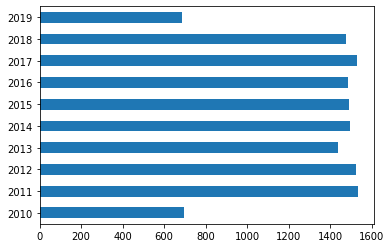

In [7]:
match_df.Date.dt.year.value_counts().sort_index().plot.barh()

In [8]:
sorted(match_df.HomeTeam.unique())

['AFC Wimbledon',
 'Accrington',
 'Arsenal',
 'Aston Villa',
 'Barnsley',
 'Birmingham',
 'Blackburn',
 'Blackpool',
 'Bolton',
 'Bournemouth',
 'Bradford',
 'Brentford',
 'Brighton',
 'Bristol City',
 'Bristol Rvs',
 'Burnley',
 'Burton',
 'Bury',
 'Cardiff',
 'Carlisle',
 'Charlton',
 'Chelsea',
 'Chesterfield',
 'Colchester',
 'Coventry',
 'Crawley Town',
 'Crewe',
 'Crystal Palace',
 'Dag and Red',
 'Derby',
 'Doncaster',
 'Everton',
 'Exeter',
 'Fleetwood Town',
 'Fulham',
 'Gillingham',
 'Hartlepool',
 'Huddersfield',
 'Hull',
 'Ipswich',
 'Leeds',
 'Leicester',
 'Leyton Orient',
 'Liverpool',
 'Luton',
 'Man City',
 'Man United',
 'Middlesbrough',
 'Millwall',
 'Milton Keynes Dons',
 'Newcastle',
 'Northampton',
 'Norwich',
 "Nott'm Forest",
 'Notts County',
 'Oldham',
 'Oxford',
 'Peterboro',
 'Plymouth',
 'Port Vale',
 'Portsmouth',
 'Preston',
 'QPR',
 'Reading',
 'Rochdale',
 'Rotherham',
 'Scunthorpe',
 'Sheffield United',
 'Sheffield Weds',
 'Shrewsbury',
 'Southampton',
 

In [9]:
match_df.columns

Index(['AC', 'AF', 'AR', 'AS', 'AST', 'AY', 'AwayTeam', 'B365A', 'B365D',
       'B365H', 'BSA', 'BSD', 'BSH', 'BWA', 'BWD', 'BWH', 'Bb1X2', 'BbAH',
       'BbAHh', 'BbAv<2.5', 'BbAv>2.5', 'BbAvA', 'BbAvAHA', 'BbAvAHH', 'BbAvD',
       'BbAvH', 'BbMx<2.5', 'BbMx>2.5', 'BbMxA', 'BbMxAHA', 'BbMxAHH', 'BbMxD',
       'BbMxH', 'BbOU', 'Date', 'Div', 'FTAG', 'FTHG', 'FTR', 'GBA', 'GBD',
       'GBH', 'HC', 'HF', 'HR', 'HS', 'HST', 'HTAG', 'HTHG', 'HTR', 'HY',
       'HomeTeam', 'IWA', 'IWD', 'IWH', 'LBA', 'LBD', 'LBH', 'PSA', 'PSCA',
       'PSCD', 'PSCH', 'PSD', 'PSH', 'Referee', 'SBA', 'SBD', 'SBH', 'SJA',
       'SJD', 'SJH', 'VCA', 'VCD', 'VCH', 'WHA', 'WHD', 'WHH', 'result_val',
       'goal_difference', 'expit_goal_difference'],
      dtype='object')

In [10]:
elo_outcome = rating.ELO(fixtures=match_df, target='result_val',player_1='HomeTeam',player_2='AwayTeam',rater_name='elo_outcome',hyperparams={'k_factor':10})

In [11]:
match_with_elo_df,_ = elo_outcome.process_all_fixtures()

In [12]:
match_with_elo_df.columns

Index(['AC', 'AF', 'AR', 'AS', 'AST', 'AY', 'AwayTeam', 'B365A', 'B365D',
       'B365H', 'BSA', 'BSD', 'BSH', 'BWA', 'BWD', 'BWH', 'Bb1X2', 'BbAH',
       'BbAHh', 'BbAv<2.5', 'BbAv>2.5', 'BbAvA', 'BbAvAHA', 'BbAvAHH', 'BbAvD',
       'BbAvH', 'BbMx<2.5', 'BbMx>2.5', 'BbMxA', 'BbMxAHA', 'BbMxAHH', 'BbMxD',
       'BbMxH', 'BbOU', 'Date', 'Div', 'FTAG', 'FTHG', 'FTR', 'GBA', 'GBD',
       'GBH', 'HC', 'HF', 'HR', 'HS', 'HST', 'HTAG', 'HTHG', 'HTR', 'HY',
       'HomeTeam', 'IWA', 'IWD', 'IWH', 'LBA', 'LBD', 'LBH', 'PSA', 'PSCA',
       'PSCD', 'PSCH', 'PSD', 'PSH', 'Referee', 'SBA', 'SBD', 'SBH', 'SJA',
       'SJD', 'SJH', 'VCA', 'VCD', 'VCH', 'WHA', 'WHD', 'WHH', 'result_val',
       'goal_difference', 'expit_goal_difference', 'elo_outcome_rating_1',
       'elo_outcome_rating_2', 'elo_outcome_rating_diff', 'elo_outcome_e'],
      dtype='object')

In [23]:
plot_df =match_with_elo_df.loc[match_with_elo_df.HomeTeam.isin([ 'Chelsea', 'Man City',]),['HomeTeam','elo_outcome_rating_1','Date']]

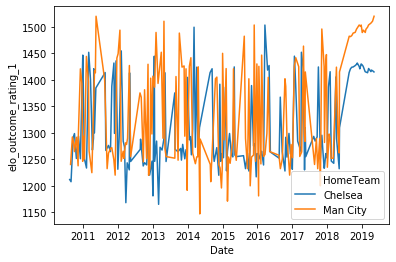

In [24]:
sns.lineplot(data=plot_df.sort_values(by='Date'),x='Date',y='elo_outcome_rating_1',hue='HomeTeam')